## Choosing location for a pet service in Toronto

In this notebook, I will explore existing venues for pets and cluster the neighborhoods in Toronto to create insights about the best location for a new pet service.


### 1. Obtaining the data from the web
#### For the Toronto neighborhood data, scraping a Wikipedia page using BeautifulSoup.

In [1]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser') #parsed the whole page

table = soup.find('table',{'class':'wikitable sortable'}) #finding the table on that page

data = [] 

table_body = table.find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) 
    
data[0:5]

[[],
 ['M1A', 'Not assigned', 'Not assigned'],
 ['M2A', 'Not assigned', 'Not assigned'],
 ['M3A', 'North York', 'Parkwoods'],
 ['M4A', 'North York', 'Victoria Village']]

#### Transforming the obtained list into a pandas dataframe

In [3]:
df = pd.DataFrame(data)
df.columns = ['PostalCode', 'Borough', 'Neighborhood']
df.dropna(inplace=True) 
df.head()

,PostalCode,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


#### Remove cells with a borough that is Not assigned.

In [4]:
df.drop(df[df['Borough']=='Not assigned'].index, axis=0, inplace=True)

#### If more than one neighborhood exist in one postal code area, combine them into one row with the neighborhoods separated with a comma.

In [5]:
df1=df.groupby('PostalCode').agg(lambda x: ', '.join(set(x)))
df1.reset_index()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Morningside, Guildwood, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Ionview, Kennedy Park, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Scarborough Village West, Cliffcrest"
9,M1N,Scarborough,"Cliffside West, Birch Cliff"


#### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [6]:
df1.loc[df1['Neighborhood']=='Not assigned', 'Neighborhood']=df1['Borough']
df1.reset_index()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Morningside, Guildwood, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Ionview, Kennedy Park, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Scarborough Village West, Cliffcrest"
9,M1N,Scarborough,"Cliffside West, Birch Cliff"


#### Getting the latitude and the longitude coordinates of each neighborhood

Download a file that contains geospatial data for Toronto, and read it into a pandas dataframe.

In [7]:
!wget --quiet -O GeospatialData.csv https://cocl.us/Geospatial_data 
print('downloaded!')

downloaded!


In [8]:
df2 = pd.read_csv("GeospatialData.csv")
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merge the new dataframe with the previous one.

In [9]:
df_geo=pd.merge(df1, df2, how='left', left_on='PostalCode', right_on='Postal Code')

Put columns in order

In [10]:
df_geo=df_geo[['Postal Code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]
df_geo.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
df_geo.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Morningside, Guildwood, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


#### Getting the registered pets data

In [11]:
!wget --quiet -O PetsData.xls https://www.toronto.ca/ext/open_data/catalog/data_set_files/2017_dog_and_cat_licence_FSA.xls
print('downloaded!')

downloaded!


In [12]:
df3 = pd.read_excel("PetsData.xls")
df3.head()

,Number of Licenced Cats and Dogs By Forward Sorting Area (FSA).,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Valid Records for period of January 01, 2017 ...",NaN,NaN,NaN
1,FSA,CAT,DOG,Total
2,M1B,285,627,912
3,M1C,297,775,1072
4,M1E,467,963,1430


#### drop all extra rows and columns, leave only postal code and total number of pets

In [13]:
df3.drop([0,1],axis=0, inplace=True)
df3.drop(['Unnamed: 1','Unnamed: 2'], axis=1, inplace=True)
df3.columns=['PostalCode','Pets']
df3.head()

,PostalCode,Pets
2,M1B,912
3,M1C,1072
4,M1E,1430
5,M1G,605
6,M1H,464


#### Append the number of pets data to the "main" dataframe

In [14]:
df = df_geo.merge(df3, how='left', on='PostalCode').fillna(0).sort_values(by='Pets', ascending=False) #fillna in case i have missing values in my pet dataset
df=df.reset_index(drop=True)
df.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Pets
0,M4C,East York,Woodbine Heights,43.695344,-79.318389,1864
1,M8V,Etobicoke,"Mimico South, New Toronto, Humber Bay Shores",43.605647,-79.501321,1848
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,1828
3,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,1809
4,M6H,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259,1761
5,M6S,West Toronto,"Swansea, Runnymede",43.651571,-79.484450,1693
6,M4J,East York,East Toronto,43.685347,-79.338106,1681
7,M4E,East Toronto,The Beaches,43.676357,-79.293031,1611
8,M2N,North York,Willowdale South,43.770120,-79.408493,1547
9,M6N,York,"The Junction North, Runnymede",43.673185,-79.487262,1487


#### Here we go.. **insight #1** from the data:
Above is the list of ten neighborhoods with the highest populations of pets.

In [15]:
df.describe()

,Latitude,Longitude,Pets
count,103.000000,103.000000,103.000000
mean,43.704608,-79.397153,785.961165
std,0.052463,0.097146,492.550165
min,43.602414,-79.615819,0.000000
25%,43.660567,-79.464763,419.000000
50%,43.696948,-79.388790,750.000000
75%,43.745320,-79.340923,1148.000000
max,43.836125,-79.160497,1864.000000


The 'min' value for number of pets is 0. Turns out, there are some areas with zero pets registered! Let's find them. 

In [16]:
df.tail(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Pets
93,M4H,East York,Thorncliffe Park,43.705369,-79.349372,126
94,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,91
95,M5H,Downtown Toronto,"Adelaide, Richmond, King",43.650571,-79.384568,44
96,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,6
97,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,0
98,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,0
99,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,0
100,M7R,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819,0
101,M7A,Queen's Park,Queen's Park,43.662301,-79.389494,0
102,M5X,Downtown Toronto,"Underground city, First Canadian Place",43.648429,-79.382280,0


### 2. Visualize pet populations in Toronto with a Choropleth map


In [17]:
import numpy as np
import json
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from geopy.geocoders import Nominatim

print('Libraries imported.')

Libraries imported.


#### Use geopy library to get the latitude and longitude values of Toronto.

In [18]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


#### Create a map of the city with neighborhoods superimposed on top.

In [19]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, neighborhood, pets in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Pets']):
    label = '{}, {}'.format(neighborhood, pets)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)  
map_toronto

Please note how some of the labels contain a few neighborhood names separated by comma. It's because labels are placed according to area postal codes rather than neighborhoods. We will assume that neighborhoods that are situated close to each other and contained within one postal area should be quite similar.

In [20]:
# download geojson file
!wget --quiet -O toronto_neigh.json https://github.com/valechkina/Coursera_Capstone/blob/master/postcodes.geojson
print('downloaded!')

downloaded!


In [21]:
toronto_geo = r'postcodes.geojson'

In [22]:
# add choropleth
threshold_scale = np.linspace(df['Pets'].min(),
                              df['Pets'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


In [23]:

map_toronto.choropleth(
    geo_data=toronto_geo,
    data=df,
    columns=['Neighborhood','Pets'],
    key_on='feature.properties.cfsauid',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Pets in Toronto by Neighborhood')
map_toronto

### 3. Get the pet venues from Foursquare 

To use the Foursquare API we have to define the credentials and version.

In [30]:
CLIENT_ID = 'UHQX2L1AA0OQ20KU5OL2TQ4YS2J5LCF34QI1UPUZM3OFFANX'
CLIENT_SECRET = 'V4UMLWFDDCJGPISYYUWYQHCHQFL0XF1LQIEDCTFKCJK3UZI4'
VERSION = '20190211'

Out of all venues in Toronto, I am only really interested in a few categories, so I copied their IDs from the Foursquare Developers website:
- Pet Service: 
5032897c91d4c4b30a586d69

- Pet Store: 
4bf58dd8d48988d100951735

- Dog Run: 
4bf58dd8d48988d1e5941735

- Veterinarian: 
4d954af4a243a5684765b473

Build functions to call Foursquare to get the list of pet stores and services and then store it in a pandas dataframe. (Functions were borrowed from the previous labs)

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    '''Call FourSquare api to retrieve nearby Pet Stores and Pet services'''
    
    venues_list=[]
    categoryID='5032897c91d4c4b30a586d69,4bf58dd8d48988d100951735,4d954af4a243a5684765b473'
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryID)
        #print(requests.get(url).json())
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            print('Your quota may have been exceeded')
            return
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    pet_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    pet_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(pet_venues)

In [32]:
LIMIT=100
radius = 700

venues = getNearbyVenues(names=df['Neighborhood'],latitudes=df['Latitude'],longitudes=df['Longitude'],radius=radius)

Woodbine Heights
Mimico South, New Toronto, Humber Bay Shores
The Beaches West, India Bazaar
High Park, The Junction South
Dovercourt Village, Dufferin
Swansea, Runnymede
East Toronto
The Beaches
Willowdale South
The Junction North, Runnymede
Markland Wood, Old Burnhamthorpe, Bloordale Gardens, Eringate
Morningside, Guildwood, West Hill
Riverdale, The Danforth West
Harbourfront, Regent Park
Islington Avenue
South Niagara, Bathurst Quay, King and Spadina, Railway Lands, CN Tower, Harbourfront West, Island airport
Princess Gardens, West Deane Park, Martin Grove, Islington, Cloverdale
Exhibition Place, Parkdale Village, Brockton
Christie
Bedford Park, Lawrence Manor East
Cliffside West, Birch Cliff
Davisville
Alderwood, Long Branch
Caledonia-Fairbanks
Parkdale, Roncesvalles
Little Portugal, Trinity
Ionview, Kennedy Park, East Birchmount Park
Leaside
Highland Creek, Rouge Hill, Port Union
Studio District
Sunnylea, Kingsway Park South East, Mimico NE, The Queensway East, Old Mill South, Hum

In [33]:
venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Woodbine Heights,43.695344,-79.318389,Donlands animal hospital,43.695034,-79.317407,Veterinarian
1,"Mimico South, New Toronto, Humber Bay Shores",43.605647,-79.501321,Pet Valu,43.602431,-79.498653,Pet Store
2,"Mimico South, New Toronto, Humber Bay Shores",43.605647,-79.501321,Pet Stuff,43.600579,-79.506061,Pet Store
3,"The Beaches West, India Bazaar",43.668999,-79.315572,Pet Valu,43.666979,-79.314665,Pet Store
4,"The Beaches West, India Bazaar",43.668999,-79.315572,Global Pet Foods,43.667162,-79.311321,Pet Store
5,"The Beaches West, India Bazaar",43.668999,-79.315572,K9 Adventure Tours,43.666473,-79.319148,Pet Service
6,"The Beaches West, India Bazaar",43.668999,-79.315572,Furballs Petstuff,43.672808,-79.319635,Pet Store
7,"High Park, The Junction South",43.661608,-79.464763,Aqua Tropics,43.665424,-79.462920,Pet Store
8,"High Park, The Junction South",43.661608,-79.464763,Diggity Dog & Lonesome Kitty Hotel & Grooming Spa,43.664693,-79.459300,Pet Service
9,"High Park, The Junction South",43.661608,-79.464763,Walk of the Town,43.666525,-79.470117,Pet Service


In [34]:
venues.shape

(167, 7)

At this point, we can see that there are duplicate venues in the returned dataframe. This is justified because one venue can be within walking distance from two neighborhoods. Therefore I decided not to clean up dupes.

#### Count how many pet venues are within the walking distance of each neighborhood

In [35]:
df4 = venues.groupby('Neighborhood').count()
#drop all the extra columns, we won't need them 
df4.drop(columns=['Neighborhood Latitude', 'Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'],inplace=True)
#give a more descriptive name venue column
df4.rename(columns={'Venue':'NumberOfVenues'},inplace=True)


#### Append the counts to our main df

In [36]:
df_counts = df.merge(df4, how='left', on='Neighborhood').fillna(0)


#### Since client is planning to offer pet walking and pet sitting services, it is important for him that there is a dog park nearby. Let's get info about existing dog parks by calling Foursquare API again.

In [37]:
def getNearbyParks(names, latitudes, longitudes, radius=700):
    '''Call FourSquare api to retrieve nearby Dog Runs'''
    
    parks_list=[]
    categoryID='4bf58dd8d48988d1e5941735'
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryID)
        #print(requests.get(url).json())
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            print('Your quota may have been exceeded')
            return
        
        # return only relevant information for each nearby venue
        parks_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    parks = pd.DataFrame([item for parks_list in parks_list for item in parks_list])
    parks.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(parks)

In [38]:
LIMIT=100
radius = 700

dog_runs = getNearbyParks(names=df['Neighborhood'],latitudes=df['Latitude'],longitudes=df['Longitude'],radius=radius)

Woodbine Heights
Mimico South, New Toronto, Humber Bay Shores
The Beaches West, India Bazaar
High Park, The Junction South
Dovercourt Village, Dufferin
Swansea, Runnymede
East Toronto
The Beaches
Willowdale South
The Junction North, Runnymede
Markland Wood, Old Burnhamthorpe, Bloordale Gardens, Eringate
Morningside, Guildwood, West Hill
Riverdale, The Danforth West
Harbourfront, Regent Park
Islington Avenue
South Niagara, Bathurst Quay, King and Spadina, Railway Lands, CN Tower, Harbourfront West, Island airport
Princess Gardens, West Deane Park, Martin Grove, Islington, Cloverdale
Exhibition Place, Parkdale Village, Brockton
Christie
Bedford Park, Lawrence Manor East
Cliffside West, Birch Cliff
Davisville
Alderwood, Long Branch
Caledonia-Fairbanks
Parkdale, Roncesvalles
Little Portugal, Trinity
Ionview, Kennedy Park, East Birchmount Park
Leaside
Highland Creek, Rouge Hill, Port Union
Studio District
Sunnylea, Kingsway Park South East, Mimico NE, The Queensway East, Old Mill South, Hum

In [39]:
print('{} venues were returned by Foursquare.'.format(dog_runs.shape[0]))

64 venues were returned by Foursquare.


Let's check how many venues were returned for each neighborhood and append the values to the main dataframe.

In [40]:
df5 = dog_runs.groupby('Neighborhood').count()
#drop all the extra columns, we won't need them 
df5.drop(columns=['Neighborhood Latitude', 'Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'],inplace=True)
#give a more descriptive name to venue column
df5.rename(columns={'Venue':'NearbyParks'},inplace=True)

In [41]:
df_grouped = df_counts.merge(df5, how='left', on='Neighborhood').fillna(0)
df_grouped.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Pets,NumberOfVenues,NearbyParks
0,M4C,East York,Woodbine Heights,43.695344,-79.318389,1864,1.0,0.0
1,M8V,Etobicoke,"Mimico South, New Toronto, Humber Bay Shores",43.605647,-79.501321,1848,2.0,0.0
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,1828,4.0,0.0
3,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,1809,3.0,1.0
4,M6H,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259,1761,2.0,4.0


Remove the neighborhoods that have zero or very less pets.

In [42]:
indexNames = df_grouped[df_grouped['Pets'] < 100].index
df_grouped.drop(indexNames , inplace=True)
df_grouped.tail()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Pets,NumberOfVenues,NearbyParks
89,M9L,North York,Humber Summit,43.756303,-79.565963,197,0.0,0.0
90,M3K,North York,"CFB Toronto, Downsview East",43.737473,-79.464763,173,0.0,0.0
91,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,148,0.0,0.0
92,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,131,3.0,1.0
93,M4H,East York,Thorncliffe Park,43.705369,-79.349372,126,0.0,0.0


Append a column with venues per pet ratio

In [43]:
df_grouped['VenuesPerPet'] = df_grouped['NumberOfVenues']/df_grouped['Pets']
df_grouped.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Pets,NumberOfVenues,NearbyParks,VenuesPerPet
0,M4C,East York,Woodbine Heights,43.695344,-79.318389,1864,1.0,0.0,0.000536
1,M8V,Etobicoke,"Mimico South, New Toronto, Humber Bay Shores",43.605647,-79.501321,1848,2.0,0.0,0.001082
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,1828,4.0,0.0,0.002188
3,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,1809,3.0,1.0,0.001658
4,M6H,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259,1761,2.0,4.0,0.001136


### 4. Cluster neighborhoods in Toronto using k-means algorithm

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### Normalize data

In [45]:
X_train = df_grouped[['Pets', 'NumberOfVenues', 'NearbyParks','VenuesPerPet']].copy()

In [46]:
scaler = StandardScaler()
X_train[['Pets', 'NumberOfVenues', 'NearbyParks','VenuesPerPet']] = scaler.fit_transform(X_train[['Pets', 'NumberOfVenues', 'NearbyParks','VenuesPerPet']])
X_train.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Pets,NumberOfVenues,NearbyParks,VenuesPerPet
0,2.240520,-0.250314,-0.524265,-0.432929
1,2.204825,0.385620,-0.524265,-0.278035
2,2.160206,1.657488,-0.524265,0.035838
3,2.117818,1.021554,0.524265,-0.114526
4,2.010732,0.385620,3.669855,-0.262860


#### Determine the number of clusters using elbow method

In [47]:
num_clusters = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in num_clusters]

score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
#score

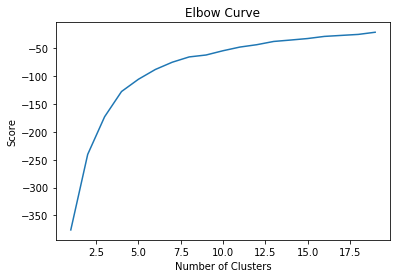

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(num_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

The elbow is at 6 clusters.

In [49]:
kclusters = 6
kmeans = KMeans(n_clusters=kclusters, random_state=0)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [50]:
# add clustering labels
df_grouped.insert(3, 'Cluster Labels', kmeans.labels_)

In [51]:
df_grouped.head()

,PostalCode,Borough,Neighborhood,Cluster Labels,Latitude,Longitude,Pets,NumberOfVenues,NearbyParks,VenuesPerPet
0,M4C,East York,Woodbine Heights,0,43.695344,-79.318389,1864,1.0,0.0,0.000536
1,M8V,Etobicoke,"Mimico South, New Toronto, Humber Bay Shores",4,43.605647,-79.501321,1848,2.0,0.0,0.001082
2,M4L,East Toronto,"The Beaches West, India Bazaar",4,43.668999,-79.315572,1828,4.0,0.0,0.002188
3,M6P,West Toronto,"High Park, The Junction South",4,43.661608,-79.464763,1809,3.0,1.0,0.001658
4,M6H,West Toronto,"Dovercourt Village, Dufferin",5,43.669005,-79.442259,1761,2.0,4.0,0.001136


#### Visualize clusters on the map

In [52]:
latitude= 43.653963
longitude= -79.387207
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_grouped['Latitude'], df_grouped['Longitude'], df_grouped['Neighborhood'], df_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5. Examining clusters and drawing insights

In [53]:
cluster_summary=df_grouped.groupby(['Cluster Labels'], as_index=False).agg('mean')
cluster_summary

,Cluster Labels,Latitude,Longitude,Pets,NumberOfVenues,NearbyParks,VenuesPerPet
0,0,43.697682,-79.395005,1174.904762,0.714286,0.238095,0.000664
1,1,43.651362,-79.380345,180.000000,3.500000,2.000000,0.020184
2,2,43.679022,-79.388186,459.000000,3.714286,1.428571,0.008312
3,3,43.739974,-79.395566,550.404762,0.309524,0.142857,0.000607
4,4,43.682428,-79.402669,1357.588235,3.294118,0.294118,0.002612
5,5,43.666580,-79.413833,1274.200000,2.800000,3.400000,0.002284


- Clusters 1, 2 and 3 don't look like good candidates, because they have very small average amount of pets per neighborhood. On top of that, clusters 1 and 2 already have one of the highest numbers of existing venues (i.e. our client's potential competitors). Therefore I am going to disregard them.

- Cluster 0 has a good mean value of pets, plus relatively small numbers of existing venues. It has potential.

- Clusters 4 and 5 have the biggest numbers of registered pets, but a high number of venues, too. Cluster 4 has the highest competition ("Venues per pet"), but not enough places to walk the dogs - only 0.29 per neighborhood on average.

- Cluster 5 looks like a good candidate, since it has lots of parks and high number of registered pets, plus medium competition.

**Let's take a closer look at clusters 0 and 5.**

#### Cluster 0

In [57]:
cluster_zero = df_grouped.loc[df_grouped['Cluster Labels'] == 0, df_grouped.columns[[1] + [2] + list(range(5, df_grouped.shape[1]))]]


In [55]:
# drop the neighborhoods that have zero parks
# Sort by number of prospective competitors
cluster_zero = cluster_zero[cluster_zero.NearbyParks != 0].sort_values(by='NumberOfVenues')
cluster_zero



,Borough,Neighborhood,Longitude,Pets,NumberOfVenues,NearbyParks,VenuesPerPet
22,Etobicoke,"Alderwood, Long Branch",-79.543484,1215,0.0,2.0,0.000000
31,York,Humewood-Cedarvale,-79.428191,964,0.0,2.0,0.000000
21,Central Toronto,Davisville,-79.388790,1216,1.0,1.0,0.000822


Alderwood, Long Branch (Etobicoke) and Humewood-Cedarvale (in York) are good candidates for the business's location, since they have lots of resident pets and zero competition nearby. Plus, each has 2 dog parks nearby to walk the dogs.

#### Cluster 5

In [59]:
cluster_five = df_grouped.loc[df_grouped['Cluster Labels'] == 5, df_grouped.columns[[1] + [2] + list(range(5, df_grouped.shape[1]))]]
cluster_five.sort_values(by='NumberOfVenues')

,Borough,Neighborhood,Longitude,Pets,NumberOfVenues,NearbyParks,VenuesPerPet
4,West Toronto,"Dovercourt Village, Dufferin",-79.442259,1761,2.0,4.0,0.001136
25,West Toronto,"Little Portugal, Trinity",-79.419750,1189,2.0,3.0,0.001682
43,Central Toronto,Davisville North,-79.390197,859,2.0,4.0,0.002328
13,Downtown Toronto,"Harbourfront, Regent Park",-79.360636,1365,4.0,3.0,0.002930
24,West Toronto,"Parkdale, Roncesvalles",-79.456325,1197,4.0,3.0,0.003342


Here, Dovercourt Village, Dufferin, Little Portugal, Trinity and Davisville North are the best candidates: they have less competition in the area and convenient location with a few parks nearby.

### 6. Results

In [68]:
# slice the full dataframe to get only recommended locations
recommend = df_grouped.loc[[4,22,25,31,43]]
# create a map with circles representing those locations
map_locations = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, neighborhood, postal in zip(recommend['Latitude'], recommend['Longitude'], recommend['Neighborhood'], recommend['PostalCode']):
    label = '{}, {}'.format(neighborhood, postal)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        parse_html=False).add_to(map_locations)  
map_locations

### 7. Summary

The following neighborhoods are recommended for out client's new business location:
- Alderwood (Etobicoke)
- Long Branch (Etobicoke)
- Humewood-Cedarvale (York) 
- Dovercourt Village (West Toronto)
- Dufferin (West Toronto)
- Little Portugal (West Toronto)
- Trinity (West Toronto) 
- Davisville North (Central Toronto)

### Thank you for reviewing my work!